# The Data Farm: Science Week Presentation

## Learning from Data

### [Neil D. Lawrence](http://staffwww.dcs.shef.ac.uk/people/N.Lawrence/) and the [Sheffield Machine Learning Research Group](http://ml.dcs.shef.ac.uk/)
#### 5th March 2014

This notebook has been made available as part of our **Open Data Science** agenda. If you want to read more about this agenda there is a [position paper/blog post available on it here](http://inverseprobability.com/2014/07/01/open-data-science/).

This session is about 'learning from data'. How do we take the information on the internet and make sense of it. The answer, as you might expect, is using computers and mathematics. Luckily we also have a suite of tools to help. The first tool is a way of programming in python that really facilitates *interaction* with data. It is known as the "[IPython Notebook](http://ipython.org/notebook.html)", or more recently as the "[Jupyter Project](http://jupyter.org/)".

### Welcome to the IPython Notebook

The notebook is a great way of interacting with computers. In particular it allows me to integrate text descriptions, maths and code all together in the same place. For me, that's what my research is all about. I try to take concepts that people can describe, then I try to capture the essence of the concept in a *mathematical* model. Then I try and implement the model on a computer, often combining it with data, to try and do something fun, useful or, ideally, both. 

For the Science Week lecture on "The Data Farm" we are looking at *recommender systems*.

## Recommender Systems

Do you watch Netflix? Have you ever rated a movie there? Do you buy books or electronics on Amazon? How about grocery shopping? All these companies want you to buy more, watch more or listen more. The best way of getting you to do that is by showing you more of what you like. But what do you like? What sort of person are you? Can the computer tell? It can certainly try! And it does so with a "Recommender System". Recommender systems are so important to Netflix that they offered a [$1 million dollar prize](http://en.wikipedia.org/wiki/Netflix_Prize) for improving theirs.

## What is a Recommender System?

To understand you the computer has to turn you into a series of numbers (but don't worry, it's not painful). In the 1960s TV series, ["The Prisoner"](http://en.wikipedia.org/wiki/The_Prisoner), Patrick McGoohan's character, and his fellow prisoners and warders were assigned a number. But their number didn't seem to reflect anything about their statuses (it couldn't even be used to distinguish between prisoner and warder. To perform computations about preferences we need to turn users into a series of numbers. How many numbers does it need to describe you? How many numbers does it take to summarize anyone's tastes in movies, music or groceries? These are open questions that can be difficult to answer. It depends how much we want to know about you: if it's just your taste in film and clothes that's one thing. If we want to summarize your state of health, that's another. 

Apparently a three year old's brain has $10^{15}$ synapses in it: a synapse governs the connection between neurons. It's quite possible that each synapse needs a number to represent it. So in the end it takes a lot of numbers to represent just the brain of a human, and that's before we start talking about what's going on in each of your cells.

We won't try to represent all this, instead we will perform a 'compression' on you. We will try to represent your opinions about films into just a few of numbers. We are going to work with movies, and just for fun, we thought we'd get you to rate some movies and try and build a recommendation system.


Note that python, like many other programs, has a lot of software libraries for doing different things. Here we used three separate libraries (which we also loaded into the computer with the `import` commands) to perform three different jobs. And the software we downloaded will also be available in the form of ... you guessed it ... a library. In this case a library that we've written in Sheffield called `pods`. In the next section we load in the library and use it to download some data for analysis. 

Note, that the next step won't work unless you've run the code for the previous step! That's because when running code in the notebook, the python kernel (which is the software in the computer that's running the python code) has a *state*. By state we mean the values of the different variables in the system. The values of these variables can have a lot of effects, like which program code is in memory, and therefore accessibile to the computer. By running commands in this notebook, we change that state of the computer all the time. The software below relies on the software above being run to work. The notebook lets you know which box was run when by placing a number beside the box. After the code's been run you should see a number like:
```
In [3]:
```
if it was the third box to be run. Or `In [2]:` if it was the second (etc.).

Whilst the notebook is waiting for the kernel to run commands, you will see `In [*]:` as the prompt. If this happens for too long, it may be that you've asked the computer to do something too complicated and it's getting slow. You can *interrupt* the kernel by selecting `Kernel->Interrupt` from the menu in the browser window above. If you get really confused about what's going on and want to wipe the state of the kernel clean, then you can select `Kernel->Restart`. That will reset the kernel's state.

In [1]:
%matplotlib inline
import pods # Our software for python open data science (pods)
import pandas as pd # the pandas library for data analysis
import numpy as np
import matplotlib.pyplot as plt

## Recommendation in Numbers

I said that we need to reduce everything to numbers for recommendations on the computer. Let's think about what those numbers could be. A recommender system aims to make suggestions for *items* (films, books, music, groceries) given what it knows about *users'* tastes. The recommendation engine needs to represent the *taste* of all the users and the *characteristics* of each object. That is what our numbers should do.

One way for organizing objects is to place related things close together. You can spend a lot of time doing this when you are supposed to be revising. It's called tidying up. Tidying up can be quite important, for example in a library we try and put books that are on related topics near to each other on the shelves. One system for doing this is known as [Dewey Decimal Classification](http://en.wikipedia.org/wiki/Dewey_Decimal_Classification). In the Dewey Decimal Classification system (which dates from 1876) each subject is given a number (in fact it's a decimal number---no surprises there!). For example, the fields of *Sciences* and *Mathematics* are all given numbers starting in the 500s. Because computers weren't around in 1876 (well a man called Charles Babbage was toying with the idea ... and a lady called Ada Lovelace was even thinking about programming languages but no one had actually built a computer) ... anyway as I was saying, because computers weren't around in 1876 they didn't get a number so they ended up being given numbers staring with 004. For example, works on the 'mathematical principles' of Computer science are given the series 004.0151 (which we might normally write as 4.0151, but when you think about it we could equally write 004.0151). Whilst it's a *classification* system for splitting books into groups (this is sometimes called a *taxonomy*) the books in the system are also normally laid out in the same order as the numbers. Ah ... back to the point numbers. 

So in the Dewey Decimal system we might now expect that neighbouring numbers represent books that are *related* to each other in subject. That seems to be exactly what we want for our recommender system! Could we somehow represent each film's subject according to a number? 

The problem here is that we are representing it with only *one* number, a so called *one* dimensional representation of the system. Actually a *one* dimensional representation of a subject can be very awkward. To see this, let's have another think about the Dewey Decimal system. However, this time we can think about subjects which have numbers in the 900s. By the way, I'm not an expert on the Dewey Decimal system, I just read the Wikipedia page on it and then found a list of the numbers from  [Nova Southeastern University](http://www.nova.edu/library/help/misc/lc_dewey/dewey900.html#40) ... I may be a bit geeky, but memorizing the Dewey Decimal numbers is a step too far for even me (and don't memorize $\pi$ either, [memorize $\tau$ instead](http://www.tauday.com/) ...).

Anway, back to those Dewey decimals ... if we look at the list for the 900s from the link above, we see that whilst the ordering for places is somewhat sensible, it is also rather arbitrary. In the 940s we have Europe listed from 940-949, Asia listed from 950-959 and Africa listed from 960-969. That seems OK, because Asia borders Europe, and Africa borders Asia (sorry I've slipped into a Geography lesson here ...). But it's also true that Africa is very close to Europe and the [Carthagian's](http://en.wikipedia.org/wiki/Carthage) had an empire that went across both ... add did the Romans (a bit of History thrown in too). 

<center><img src="http://upload.wikimedia.org/wikipedia/commons/9/9b/Carthaginianempire.PNG", width=500>
<i>A map of the Carthagian Empire from Wikipedia. Hannibal famously took his African elephants from the purple bit, through Spain, and over the Alps to take the Romans by surprise in the red bit. It did surprise the Romans, but perhaps not as much as it surprised the elephants.</i>
</center>

Where should those books go? If they went between Africa and Europe they'd end up in Asia ... which would be wrong. Ah! But that's easy to solve, let's just represent the subject by *two* numbers and then we can lay out the books like a map!

Inspired by the map example we can start considering how we might lay out *films* in two dimensions. Although we also would like to characterize people too ... maybe we could also make a map of people's interests. In fact maybe the map could be a map of the same space. Let's think of it as a film library ... then the people could sit *near* the *films* they were interested in. We would have two maps of the same place. One of where the films are, and one of where the people are. People could sit near the films they like, and then they wouldn't have to move far to get the next film they'd want to watch (don't take the analogy too far though, if you start thinking about toilets and snack bars it kind of breaks down ... but fortunately we've turned you into a number now so you don't need the toilet or a snack bar). 

That's it! We've cracked it ... or at least we've come up with *one* way of doing it. Although now, the fun just starts. Once you've had the idea, now you get to do the maths.

## Vectors

Do you know about vectors? Vectors are great. Vectors are just a way of carrying a series of numbers about together. Not around town and to Meadowhall of course (even numbers don't like going to Meadowhall), but mathematically. I can represent lots of things by vectors, anything I can represent by numbers in fact. So since people can be numbers, I can represent *people* by vectors. This is not such a strange thing, and in fact it is being done to you all the time. If you use Facebook, they represent you by a vector (or actually more than one vector ... but all vectors can be returned to one vector at the end of the day ... have a think about why that is so). The vector that facebook have determines which items will come to the top of your news feed. It determines what adverts you see. It *even* determines who your friends are ... well actually that's taking it a bit far ... it just determines who Facebook *suggests* to you for friends. 

Of course it's fun to represent people by numbers, if only to freak them out a bit, but in reality they don't do it for that reason. The vector Facebook stores about you is pretty important because it determines what your *experience* of Facebook is. If it's a good experience, then you'll go there and interact more ... if it's a dull experience you'll wonder off to WhatsApp or Instagram ... or maybe even Google+.  If they get that vector right, they've captured something about your personality and they can create a better Facebook tailored for you.

When we write a vector down we do it like so:
$$
\mathbf{v} = \begin{bmatrix}1\\2\end{bmatrix}
$$
That is a special container for 2 numbers, the numbers themselves are 1 and 2. Sometimes we write the vector like this:
$$
\mathbf{v} = \begin{bmatrix}v_1\\v_2\end{bmatrix}
$$
where we are just saying the first number is given by $v_1$ and the second by $v_2$. 
Vectors are often used for speed (or more correctly *velocity*). So $v_1$ could be velocity in the Westerly direction and $v_2$ could be velocity in the Northerly direction. When people are piloting planes, they are often told they are being 'vectored'. It doesn't mean Facebook are turning them into a series of numbers (although Facebook probably are, that's just not what they mean on this occasion). It means that they are being told to go somewhere through a series of vectors.

I like $\mathbf{v}$ for vector so I'm going to use it to represent our films. Every film has it's own vector. But there are lots of films, so to avoid confusiong them we need to *index* our vectors. First we think that every film is given an index, $j$. Then the vector associated with the film is given by $\mathbf{v}_j$. 

I'm going to do the same to you. And I'm going to use $\mathbf{u}$. I like to use $\mathbf{u}$ for you, and then index by $i$ for the users. So each user is represented by $u$ and indexed by $i$ like so: $\mathbf{u}_i$. 

So now you are all $\mathbf{u}$s and films are all $\mathbf{v}$s we can think about how we pull together films and people. 

If we have a movie rating, then we can represent it by $y$. That's easy, because it's just a number. But it's a number that is associated with a *user* and a *film*. That means it needs *two* indices: $i$ and $j$. One for the person and one for the film. So now we can represent all the ratings as $y$_{i,j}.

### Dot Products

How do you multiply vectors together? One way is the *dot product*. If we take the dot product (or inner product) between two vectors then we simply take each of their corresponding elements, multiply them together and sum the result.

We now need a measure for determining the similarity between the item and the user: how close the user is sitting to the item in the rooom if you like. We are going to use the inner product between the vector representing the item and the vector representing the user. 

The [dot product](http://en.wikipedia.org/wiki/Dot_product) between two vectors $\mathbf{a}$ and $\mathbf{b}$ is written as $\mathbf{a}\cdot\mathbf{b}$. Mathematically we can write the *sum* as follows:
$$
\mathbf{a}\cdot\mathbf{b} = \sum_{i} a_i b_i
$$

What's that got to do with recommendation? Well, the inner product can be seen as a measure of *similarity*. How so? Well one clever thing about the inner product that arises from trigonometry is that the inner product is related to the the cosine of the angle between the two vectors.

The smaller the angle between two vectors the larger the inner product. 
$$
\mathbf{a}\cdot\mathbf{b} = |\mathbf{a}||\mathbf{b}| \cos(\theta)
$$
where $\theta$ is the angle between two vectors and $|\mathbf{a}|$ and $|\mathbf{b}|$ are the respective lengths of the two vectors. This diagram from Wikipedia illustrates part of what's going on:

<img src="http://upload.wikimedia.org/wikipedia/commons/3/3e/Dot_Product.svg">

Here we $A$ and $B$ as the vectors, we can think of $A$ and $B$ as two different people (traditionally we calle them [Alice and Bob](http://en.wikipedia.org/wiki/Alice_and_Bob) ... their nemesis is someone called Eve, but we don't need her today, so let's not go into that). The cosine is applied to the angle between the vectors (or people). Here the diagram illustrates that the cosine multiplied by the length of the vector gives the projection of one vector onto the other. This will be familiar to anyone who's had to work with 'resultant forces' in mathematics. Although in our case it's more like 'resultant personalities' or 'resultant tastes'. That would be the portion of Alice's tastes that is shared with Bob. We could construct a similar analagy for items, projecting one film or book onto another. Note that if the two items or users are in the same place ($A$=$B$), then for the purposes of our model they represent the same thing (or the same person).

So the cosine is important in our model, so let's plot it using the notebook. Again note that it takes more lines to do the plotting than it takes to compute cosine!

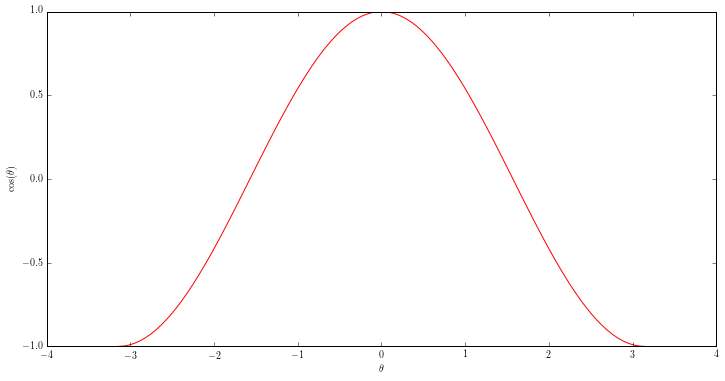

In [2]:
# plotting cosine
tau = 2*np.pi # tau is 2 times pi.

theta = np.linspace(-0.5*tau, 0.5*tau, 100) # this gives us 100 points in *radians* (in degrees they'd be from -180 to 180)
f = np.cos(theta)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(theta, f, 'r-')
plt.xlabel('$\\theta$')
plt.ylabel('$\\cos(\\theta)$')

We can immediately see that if the angle is small, cosine will be big. If it is large, cosine goes negative (at 180 degrees cosine is -1). So a *negative* inner product is associated with a wide angle and a large inner product is associated with a *narrow* angle. If the angle is *wide* then the two points described by the vectors will be far apart. If the angle is narrow then the two points will be nearer to each other (assuming the lengths of the two vectors doesn't vary much between the two inner products). 

In our library we want each user to be sitting near the items they like (or rate highly) so we want the inner product to be large if the rating is high and small if the rating is low. We can do this by trying to force the inner product $\mathbf{u}_i^\top\mathbf{v}_j$ to be similar to the rating given by the user, $y_{i,j}$. To ensure this we will use a sum of squares objective function for all user ratings.

We can immediately see that if the angle is small, cosine will be big. If it is large, cosine goes negative (at 180 degrees cosine is -1). So a *negative* inner product is associated with a wide angle and a large inner product is associated with a *narrow* angle. If the angle is *wide* then the two points described by the vectors will be far apart. If the angle is narrow then the two points will be nearer to each other (assuming the lengths of the two vectors doesn't vary much between the two inner products). 

In our library we want each user to be sitting near the items they like (or rate highly) so we want the inner product to be large if the rating is high and small if the rating is low. We can do this by trying to force the inner product $\mathbf{u}_i^\top\mathbf{v}_j$ to be similar to the rating given by the user, $y_{i,j}$. To ensure this we will use a sum of squares objective function for all user ratings.

### The Library as an Infinite Plane

Let's imagine a library which stores all the items  we are interested in, not just books, but films and shopping items too. Such a library is likely to be very large, so we'll imagine it on an infinite two dimensional plane (if your head starts hurting, stop imagining the plane and definitely don't think of a infinite plane in four dimensions, becaue that's more painful). 

To recap, this means we can use *numbers* to represent the location of each item on the plane. For a two dimensional plane, we need to store the locations in a vector of numbers: we can decide that the $j$th item's location in the library is given by 
$$
\mathbf{v}_j = \begin{bmatrix} v_{j,1} \\ v_{j,2}\end{bmatrix},
$$
where $v_{j,1}$ represents the $j$th item's location in the East-West direction (or the $x$-axis) and $v_{j,2}$ represents the $j$th item's location in the North-South direction (or the $y$-axis). Now we need to specify the location where each user sits so that all the items that interest them are nearby: we can also represent the $i$th user's location with a vector 
$$
\mathbf{u}_i = \begin{bmatrix} u_{i,1} \\ u_{i,2}\end{bmatrix}.
$$
Finally, we need some way of recording a given user's affinity for a given item. This affinity might be the rating that the user gives the film. We can use $y_{i,j}$ to represent user $i$'s affinity for item $j$. 

For our film example we might imagine wanting to order films in a few ways. We could imagine organising films in the North-South direction as to how romantic they are. We could place the more romantic films further North and the less romantic films further South. For the East-West direction we could imagine ordering them according to how historic they are: we can imagine placing science fiction films to the East and historical drama to the West. In this case, fans of historical romances would be based in the North-West location, whilst fans of Science Fiction Action films might be located in the South-East (if we assume that 'Action' is the opposite of 'Romance', which is not necessarily the case). How do we lay out all these films? Have we got the right axes? In machine learning the answer is to 'let the data speak'. Use the data to try and obtain such a lay out. To do this we first need to obtain the data.

In [3]:
import os
# I have a python script on my computer that collates all your ratings. Then it writes the results to a dropbox directory.
# this line loads that result from the dropbox directory.
url = 'http://staffwww.dcs.shef.ac.uk/people/N.Lawrence/dataset_mirror/data_farm/The_Data_Farm_Movie_Ratings.csv'
pods.util.download_url(url, store_directory = 'data_farm', 
                       save_name='The_Data_Farm_Movie_Ratings.csv')
movies = pd.read_csv(os.path.join('data_farm', 'The_Data_Farm_Movie_Ratings.csv'),
                     header=0, na_values=[-1, 'NaN']).set_index('userid')
movies.drop(labels=movies.columns[-4:], axis=1, inplace=True)
movies = movies.T
movies = movies.rename(columns={movies.columns[0]:'title'})
movies= movies.drop(movies.index[np.arange(14)])
movies=movies.rename(columns={'userid':'user_names'})


The_Data_Farm_Movie_Ratings.csv
[==============================]   0.021/0.021MB


Now we have the ratings you've all put in available in new `movies` data frame which includes your ratings (if you've made them).

## Objective Functions and Optimisation

How do we get the computer to learn? My research area is known as 'machine learning', and it's one of the dominant areas of artificial intelligence at the moment. Broadly speaking, in machine learning we try to specify an *objective function*. The objective function is like a landscape in which we can move around. We move around by changing *parameters*. The objective function defines which bits of the landscape are good (ironically these are the *low* points) and the points in the landscape which are bad (these are the *high* points). This process is known as optimization (don't confuse it with optimism, where high points and low points provide different roles). 

We learn from data by trying to find points in this landscape that are low down. You may already be familiar with this example though fitting a straight line, where the objective function is known as the *sum of squared errors*. This objective function was first proposed by Legendre in the early 19th century as a way of 'learning' the orbits of planets.
$$
y=mx+c
$$
but it can't go through all the points. Instead you choose values for $m$ and $c$ that make the line go as close to the points as possible. How do you defien close? One way is to measure the distance with the  'sum of squares'.
$$
e = \sum_i (y_i - m x_i + c)^2
$$
where the points you want the line to go through are given by $x_i$ and $y_i$. 

### An Objective for the Recommender System

For our recommender system we also want to estimate the sum of square errors. But the error we are trying to minimize is given by
$$
e = \sum_i \sum_j (y_{i,j} - \mathbf{u}_i\cdot\mathbf{v}_i)^2
$$
where the dot, $\cdot$, represents the *inner* product between the vectors. We want this error to be as small as possible, and we will reduce it by changing the values of each $\mathbf{u}_i$ and $\mathbf{v}_i$. 

When we are done, if we want to predict your score for any film ($y_{i,j}$) then we just compute the *inner product* between  $\mathbf{u}_i$ and $\mathbf{v}_j$. 

Oh! But there's a problem! We don't have *all* the values for $y_{i,j}$ in our data! We only have the ones you rated. Actually, you can do a lot of clever maths to show that this doesn't matter and you don't really need to worry about those ones (you just throw those ones away). If someone asks why you can throw them away then just tell them it's because of [*Kolmogorov Consistency*](http://en.wikipedia.org/wiki/Kolmogorov_extension_theorem). Trust me, most people won't ask you again ... and if they do ask you again then you've *definitely* found someone interesting to talk to.

To take care of the 'throwing away' effect, then we often add another variable $s_{i,j}$ which we define to be 1 if we have the rating and 0 otherwise. Then we can leave the sum across all values in and write the objective function as:

The total objective function can be written as
$$
e = \sum_{i,j} s_{i,j} (y_{i,j} - \mathbf{u}_i^\top \mathbf{v}_j)^2
$$

## Objective Optimization

We need to minimize the sum of squared errors: we want the 'gap' between our prediction and the truth to be as small as possible. Today we are going to do that via *gradient descent* or *steepest descent*. 

What is this algorithm? Well, we can again use the analogy of the objective function as a hilly surface, one that you want to get to the bottom of. Let's say you are at the top of Kinder and you want to get to Edale station. One way of getting there would be to just walk downhill in the *steepest* direction. Then if Edale station is at the bottom of the valley (which it isn't quite) and  as long as you don't get stuck in one of the many hollows around the place (which you would) eventually you'd arrive at Kinder station (don't try this, even if you didn't get stuck in a hollow, you'd likely fall off a cliff and I'd get in trouble). OK, but you get the idea. It turns out that we can use the technique of *differentiation* to compute the gradient of the objective function. The gradient is also a *vector*. And the gradient *descent* algorithm involves simply taking your current vector and subtracting off the gradient. It's rather like what a ball would do if it was pushed off Kinder Scout (well, actually, the ball would probably be blown upwards knowing the winds up there). Now, what does that look like in practice I hear you ask? Enough of this talk of libraries, balls and fell walking (or falling)!

After some nice maths (this time due to [Newton](http://en.wikipedia.org/wiki/Isaac_Newton) and [Leibniz](http://en.wikipedia.org/wiki/Gottfried_Wilhelm_Leibniz) who independently developed differentiation) you get the following *update* rule everytime you see a film rating:
$$
\mathbf{u}_{i} \leftarrow \mathbf{u}_{i} + \eta \mathbf{v}_j(y_{i,j}-\mathbf{u}_i^\top \mathbf{v}_j) 
$$
where $\eta$ (which is pronounced *eta* in English) is a Greek letter representing the *learning rate*. It's not a very complicated thing, but we can make it seem that way by using a greek letter (although I teach a lot of Greek's who must really think I've ovecomplicated the $\mathbf{u}$ and $\mathbf{v}$ thing. 

The arrow just means that the updated value of $\mathbf{u}$ is given by the old value of $\mathbf{u}$ plus the vector associated with the film multiplied by the learning rate and $(y_{i,j}-\mathbf{u}_i^\top \mathbf{v}_j)$. But what is $(y_{i,j}-\mathbf{u}_i^\top \mathbf{v}_j) $? It is the difference between our prediction and the rating that we want to see. The prediction can either be *just right* (baby bear) in which case it will be zero and the new value for $\mathbf{u}_i$ will be the same as the old one or the prediction can be *too large* (daddy bear) in which case the number will be *negative* and $\mathbf{u}$ will move in the *opposite* direction to $\mathbf{v}$ or it can be *too small* (mummy bear) in which case the number will be *positive* and the $\mathbf{u}_i$ will move towards $\mathbf{v}$.

Three situations then. For each film you either have:

1. Baby bear (stay wear you are).
2. Daddy bear, predicted score too big! (move away from the film).
3. Mummy bear, predicted score too small! (move towards the film).

OK then Goldilocks? What next? Well, that may be enough time thinking about it, time to implement it on the computer and play around a bit!

## Steepest Descent Algorithm

In the steepest descent algorithm we aim to minimize the objective function by subtacting the gradient of the objective function from the parameters. 

To program this we need to store the parameters in the computer. We are going to store our vectors together in a *matrix* which is simply a group of vectors placed together (rather like a vector is a group of numbers placed together). We will call these matrices $\mathbf{U}$ and the matrix $\mathbf{V}$. 

We need some initial values for them. The code below sets the initial values to small randomly distributed values.

Actually, I told you a little 'white lie' there, we aren't storing the data in *just* a matrix, but we are again using a `pandas` *data frame*. As we saw above, this object doesn't just store the numbers but some of the information about the numbers, this means that rather than just indexing with numbers $i$ and $j$ we can index things with something a bit more human readable. To see this, let's print the starting positions, we should see very quickly the nicknames you used for storing your movie ratings alongside the numbers.

### Preprocessing the Data

Very often there are sensible changes we can make to the data to make learning easier. Firstly, we need to convert the movies data frame into something a bit more usable for processing. We'd like the data to be in user/item/rating triplets. And we'd like to throw away all the missing ratings. The lines below 'prepare' the data for processing. They are a bit more complex than some of the other stuff we are doing (and they took me a while to work out! So don't worry if they are confusing, it's probably my poor choice of syntax, although it's not even poetic like `perl`). At the end we display `Y` to try and give you the idea of what we've done to the `movies` data to get `Y` out.

In [4]:
# This command takes the columns 'Film' and 'index' and creates a new 'triplet structure' like the one we mentioned above
Y = pd.melt(movies.reset_index(), id_vars=['title', 'index'], 
            var_name='user', value_name='rating')
            #value_vars=user_names)
# this command renames the column titled 'index' with the title 'item'
Y.rename(columns={'index':'item'}, inplace=True)
# This command removes all the missing values.
Y = Y.dropna(axis=0)
Y[['rating']] = Y[['rating']].astype(int)
Y.item = Y.item.apply(lambda x: int(x[1:]))

In [5]:
q = 2 # the dimension of our map of the 'library'
counter = 0 # a counter for storing how many updates we've done.
user_names = movies.columns[1:]
movie_index = Y.item.unique()
init_u = np.random.normal(size=(len(user_names), q))*0.001
init_v = np.random.normal(size=(len(movie_index), q))*0.001
U = pd.DataFrame(init_u, index=user_names)
V = pd.DataFrame(init_v, index=movie_index)


Now we can take a look at the data, and what people's ratings were.

In [6]:
Y

,title,item,user,rating
6,Scream (1996),288,lawrennd,4
8,Air Force One (1997),300,lawrennd,4
9,Independence Day (ID4) (1996),121,lawrennd,3
50,Amadeus (1984),191,lawrennd,4
69,"Fish Called Wanda, A (1988)",153,lawrennd,4
81,"Time to Kill, A (1996)",282,lawrennd,3
118,Star Trek IV: The Voyage Home (1986),230,lawrennd,2
165,Grease (1978),451,lawrennd,3
174,Pretty Woman (1990),739,lawrennd,4
195,Fried Green Tomatoes (1991),660,lawrennd,4


If you have time you can have a look at what `movies` looks like and what `Y` looks like. If you are familiar with *spreadsheets* like Excel then try and imagine trying to store both these objects in the same sheet. How do you go from one representation to the other? It *might* take a lot of operations (i.e. clicking around and copying and pasting). Compare this to the lines above. They take more knowledge to learn, but once you have that knowledge your life is much easier. 

This new format makes it *much* easier to look at the ratings as a whole. For example we can histogram them.
extract the mean of all the ratings from the ratings column.

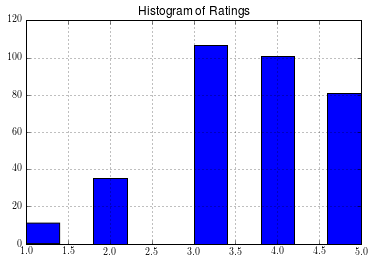

In [7]:
Y.rating.hist()
plt.title('Histogram of Ratings')

And it's easy now to subtract the mean from the data.

In [8]:
Y.rating = Y.rating - Y.rating.mean()

Subracting the mean is a sensible step, because the inner product can represent both negative numbers and positive numbers, yet the ratings we had so far were positive only. Subtracting the mean will cause $\mathbf{u}$ to try and be at a wide angle from $\mathbf{v}$ for the low ratings, because now the target value ($y_{i,j}$) is negative. Sensible steps like this taken before we do our analysis are known as *pre-processing* the data.

We'll also write a quick function that we can call for computing the *objective*, just so that we can monitor progress.

In [9]:
def objective(Y_vals, U_vals, V_vals): 
    obj = 0.
    for ind, series in Y_vals.iterrows():
        film = series['item']
        user = series['user']
        rating = series['rating']
        prediction = np.dot(U_vals.loc[user], V_vals.loc[film])  #vTu
        diff = prediction - rating # vTu - y
        obj += diff*diff
    return obj

And let's set up our learning rate, and a counter to store the number of iterations you've done.

### Optimisation

Now we have the initial values set and the pre-processing done, we can start the optimisation. 


In [10]:
learn_rate = 0.1
counter = 0

In [11]:

epochs = 30
for i in range(epochs):
    # loop across the ratings        
    for ind, series in Y.iterrows():
        # get which film and user and value the rating us
        film = series['item']
        user = series['user']
        y = series['rating']
        # get u and v out from storage.
        u = U.loc[user].values
        v = V.loc[film].values # get the u and v vectors from the matrices.
        # compute the update for u
        diff = (y-np.dot(u,v))#-mu-nu)
        u = u + learn_rate*v*diff 
        # compute the update for v
        v = v + learn_rate*u*diff
        # put u and v back in storage.
        U.loc[user]=u
        V.loc[film]=v

        counter +=1
        if not counter % 1000: # checks if there is no remainder from dividing counter by 1000.
            obj = objective(Y, U, V) #, Mu, Nu)
            print "Update:", counter, "Objective:", obj 

Update: 1000 Objective: 377.32408548
Update: 2000 Objective: 377.308145576
Update: 3000 Objective: 376.987225248
Update: 4000 Objective: 369.645101982
Update: 5000 Objective: 300.221247339
Update: 6000 Objective: 186.529277007
Update: 7000 Objective: 113.151177741
Update: 8000 Objective: 79.7324086598
Update: 9000 Objective: 61.6244833933
Update: 10000 Objective: 49.5655234096


## Plotting the Result

So now we have learned those parameters, let's plot the map of where you are and where the movies are in the library!

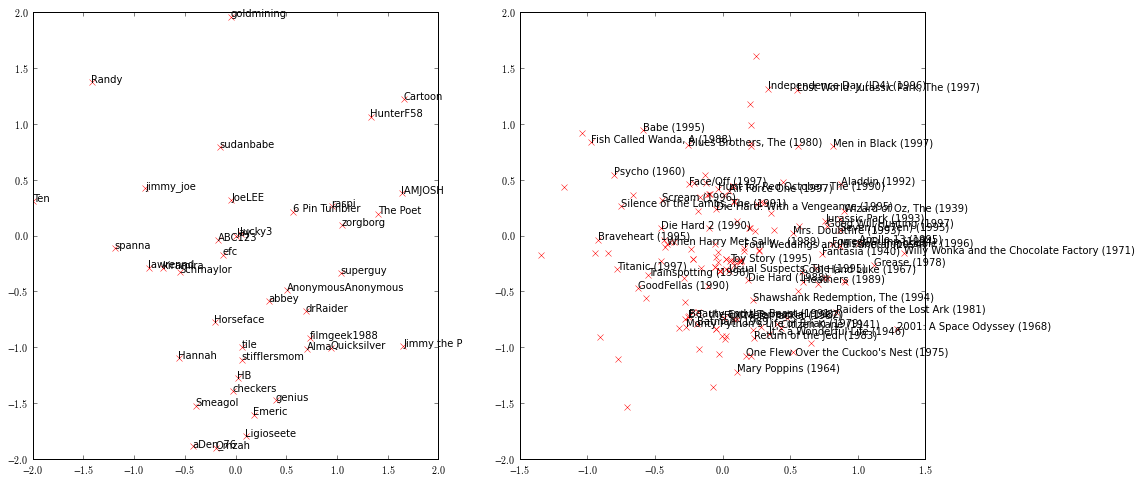

In [12]:
# create a figure axis
# create a new figure axis    
fig, axes = plt.subplots(1, 2, figsize=(16,8))
plt.rcParams['text.usetex'] = False

# plot the movies, and label with your names
axes[0].plot(U[0], U[1], 'rx')
for name in U.index:
    axes[0].text(U[0][name], U[1][name], name)


axes[1].plot(V[0], V[1], 'rx')
for index in V.index:
    # display the movie name if it was rated more than 2 times.
    if np.sum(Y['item']==index)>2:
        axes[1].text(V[0][index], V[1][index], movies['title']['q'+str(index)])

In [13]:
user = 'Schmaylor'
Y[Y.user==user]
#U.loc[user]

,title,item,user,rating
7432,E.T. the Extra-Terrestrial (1982),423,Schmaylor,0.385075
7454,"Usual Suspects, The (1995)",12,Schmaylor,1.385075
7466,"Blues Brothers, The (1980)",186,Schmaylor,0.385075
7468,Trainspotting (1996),475,Schmaylor,1.385075


## Making Predictions

Predictions can be made from the model of the appropriate rating for a given user, $i$, for a given film, $j$, by simply taking the inner product between their vectors $\mathbf{u}_i$ and $\mathbf{v}_j$. 

## Is Our Map Enough? Are Our Data Enough?

Is two dimensions really enough to capture the complexity of humans and their artforms? Is that how shallow we are? On second thoughts, don't answer that. We would certainly like to think that we need more than two dimensions to capture our complexity. 

Let's extend our books and libraries analogy further: consider how we should place books that have a historical *timeframe* as well as some geographical location. Do we really want books from the 2nd World War to sit alongside books from the Roman Empire? Books on the American invasion of Sicily in 1943 are perhaps less related to books about Carthage than those books that study the Jewish Revolt from 66-70 (in the Roman Province of Judaea---more History!). So books that relate to subjects which are closer in time should probably be stored together. However, a student of 'rebellion against empire' may also be interested in the relationship between the Jewish Revolt of 66-70 and the Indian Rebellion of 1857 (against the British Empire), nearly 1800 years later (they might also like the Star Wars movies ...). Whilst the technologies involved in these revolts would be different, they still involve people (who we argued could all be summarised by sets of numbers) and the *psychology* of those people is shared: a rebellious nation angainst their imperial masters, triggered by misrule with a religious and cultural background. 

To capture such nuances we would need further dimensions in our latent representation. But are further dimensions justified by the amount of data we have? Can we really understand the facets of a film that only has at most three or four ratings? One answer is to collect more data to justify extra dimensions. 